# 뉴스 기사 분류 문제
* 로이터 데이터 세트를 이용하여 뉴스 기사를 분류합니다.

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

## 로이터 데이터 세트
* 1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합입니다.
* 46개의 토픽이 있으며 각 토픽은 10개 이상의 샘플을 가집니다.
* 가장 자주 등장하는 단어 10000개만을 사용합니다.

In [0]:
from keras.datasets import reuters
import numpy as np

np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
np.load = np_load_old

IMDB 데이터셋에서처럼 num_words=10000 매개변수는 데이터에서 가장 자주 등장하는 단어 10,000개로 제한합니다.

여기에는 8,982개의 훈련 샘플과 2,246개의 테스트 샘플이 있습니다:

## 데이터 가공

* IMDB 와 같은 방식으로 데이터를 가공합니다.

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

이전 예제와 같이 One-Hot 벡터로 변환합니다.

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 신경망 모델 만들기
* 이전과 같이 총 3개의 층을 가진 모델을 만듭니다.
* 이전과는 다르게 한 층당 64개의 뉴런을 사용합니다.

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

W0729 12:45:45.256407 139893921613696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0729 12:45:45.276229 139893921613696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 12:45:45.280518 139893921613696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



## 신경망 모델  그래프 정의하기
* 이전 모델과 같이 신경망 모델 그래프를 정의합니다.
* 앞서 만든 모델을 컴파일 하여 Tensorflow 그래프를 생성합니다.
* 이진 Corss-Entropy 오차를 Adam Optimizer 로 최소화 하는 최적화로 정의합니다.

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

W0729 12:45:49.214541 139893921613696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0729 12:45:49.273791 139893921613696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



## 검증 데이터 분리
* 이전과 같이 테스트용 데이터 세트에서 처음 본 데이터에 대한 모델의 정확도를 측정하기 위해 훈련 데이터에서 10000개의 샘플을 떼어서 검증 데이터 세트를 만듭니다.

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## 훈련
* 이전과 같이 전체 데이터를 512크기의 무작위 배치를 만들어 20번 훈련 시킵니다.

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

W0729 12:45:53.507691 139893921613696 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0729 12:45:53.562762 139893921613696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 175us/step - loss: 3.2648 - acc: 0.4109 - val_loss: 2.4808 - val_acc: 0.5350
Epoch 2/20
7982/7982 [==============================] - 1s 138us/step - loss: 1.9815 - acc: 0.5732 - val_loss: 1.6440 - val_acc: 0.6220
Epoch 3/20
7982/7982 [==============================] - 1s 140us/step - loss: 1.3958 - acc: 0.6977 - val_loss: 1.3563 - val_acc: 0.7080
Epoch 4/20
7982/7982 [==============================] - 1s 137us/step - loss: 1.1034 - acc: 0.7583 - val_loss: 1.1945 - val_acc: 0.7390
Epoch 5/20
7982/7982 [==============================] - 1s 137us/step - loss: 0.8871 - acc: 0.8076 - val_loss: 1.0831 - val_acc: 0.7650
Epoch 6/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.7098 - acc: 0.8477 - val_loss: 0.9983 - val_acc: 0.7850
Epoch 7/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.5645 - acc: 0.8805 - val_loss: 0.9487 - val_acc: 0.7970


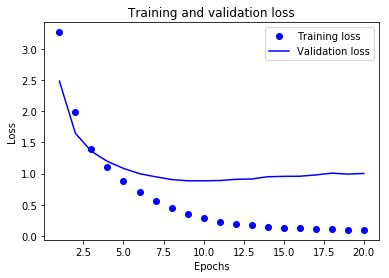

In [12]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

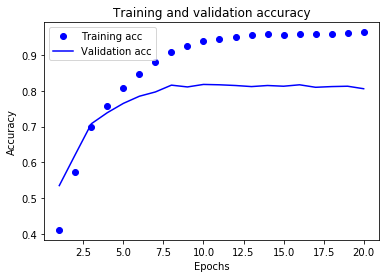

In [13]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

9번째 epoch 이후에 과적합이 시작 되는것을 알 수 있습니다. 9번째 까지만 훈련되게 모델을 다시 정의합니다.

In [14]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 180us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 145us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 141us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 139us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 138us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 140us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 141us/step - loss: 0.4124 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

In [15]:
results

[1.0224983157160445, 0.7756010686194165]

78% 의 정확도를 달성 하였습니다! 데이터를 섞어서 무작위로 분류한다면 19% 정도를 달성 합니다.

## 과적합 문제 실험
마지막 출력보다 작은 중간층을 사용 한다면 어떤 결과가 나오는지 실험 합니다.

In [16]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 223us/step - loss: 3.1600 - acc: 0.2413 - val_loss: 2.5982 - val_acc: 0.2810
Epoch 2/20
7982/7982 [==============================] - 1s 180us/step - loss: 2.0455 - acc: 0.5499 - val_loss: 1.6996 - val_acc: 0.5860
Epoch 3/20
7982/7982 [==============================] - 1s 179us/step - loss: 1.4989 - acc: 0.6264 - val_loss: 1.5078 - val_acc: 0.6430
Epoch 4/20
7982/7982 [==============================] - 1s 181us/step - loss: 1.2868 - acc: 0.6914 - val_loss: 1.4092 - val_acc: 0.6780
Epoch 5/20
7982/7982 [==============================] - 1s 179us/step - loss: 1.1443 - acc: 0.7166 - val_loss: 1.3630 - val_acc: 0.6850
Epoch 6/20
7982/7982 [==============================] - 1s 181us/step - loss: 1.0395 - acc: 0.7323 - val_loss: 1.3407 - val_acc: 0.6960
Epoch 7/20
7982/7982 [==============================] - 1s 177us/step - loss: 0.9573 - acc: 0.7420 - val_loss: 1.3396 - val_acc: 0.6990
